In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
def fft_peaks(a, peaks=None):
    # fast fourier analysis and return n-peak
    n = a.size
    a_z_without_mean = a - np.mean(a)
    yfreq = np.fft.rfft(a_z_without_mean, n, norm='ortho')
    yfreq = np.abs(yfreq)
    yfreq[0] = 0.0
    if peaks == None:
        peaks = len(yfreq)
    yfreq[yfreq < sorted(yfreq, reverse=True)[:peaks][-1:]] = 0
    return yfreq#sorted(yfreq, reverse=True)[:peaks]

In [8]:
df = pd.read_csv("ml_training_backup")
#df = df[df["Waschprogramm"] != "Default"]
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y/%m/%d %H:%M:%S')
df.sort_values(by="datetime", inplace=True)

df["timediff"] = df["datetime"].diff().apply(lambda x: x/np.timedelta64(1, 'ms')).fillna(0).astype('int64')
df["A"] = np.sqrt(df["AX"]**2 + df["AY"]**2 + df["AZ"]**2)

Text(0, 0.5, 'Anzahl')

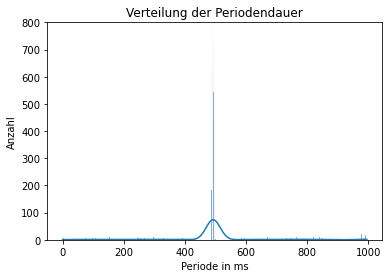

In [9]:
sns.histplot(df["timediff"], kde=True)
plt.ylim(0, 800)

plt.title("Verteilung der Periodendauer")
plt.xlabel("Periode in ms")
plt.ylabel("Anzahl")

In [10]:
start = df["datetime"].iloc[1]
end = df["datetime"].iloc[-1]
duration_ms = (end-start).total_seconds() * 1000
period = 500

calc_quantity = duration_ms/period
real_quantity = len(df)

quality = calc_quantity/real_quantity

quality_percent = round(quality*100, 2)
loss_percent = round(100-quality_percent, 2)

print("Die Datenqualität beträgt {} %. {} % der Daten wurden nicht übertragen.".format(quality_percent, loss_percent))

Die Datenqualität beträgt 98.48 %. 1.52 % der Daten wurden nicht übertragen.


In [11]:
df

,Unnamed: 0,_id,datetime,AX,AY,AZ,Waschprogramm,Gewicht,Drehzahl,Trommel,Pumpe,Betriebszustand,timedelta,timediff,A
1,1,61e6ea92e8c89e07ca6fed17,2022-01-18 16:27:57.593,0.03833,0.99976,-0.11646,Default,0.5,1200.0,0,0,1,-0.367,0,1.007250
0,0,61e6ea91e8c89e07ca6fed16,2022-01-18 16:27:57.960,0.03564,0.99414,-0.11646,Default,0.5,1200.0,0,0,1,0.000,367,1.001573
3,3,61e6ea93e8c89e07ca6fed19,2022-01-18 16:27:58.590,0.04248,0.99805,-0.11328,Default,0.5,1200.0,0,0,1,0.630,630,1.005356
2,2,61e6ea92e8c89e07ca6fed18,2022-01-18 16:27:58.910,0.03857,0.99512,-0.10522,Default,0.5,1200.0,0,0,1,0.950,320,1.001410
5,5,61e6ea94e8c89e07ca6fed1b,2022-01-18 16:27:59.585,0.04248,0.99268,-0.12427,Default,0.5,1200.0,0,0,1,1.625,675,1.001330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9395,9395,61e6fcebe8c89e07ca7011c9,2022-01-18 17:45:04.250,0.03833,0.99976,-0.11133,Koch/Buntwäsche 60,0.5,1200.0,0,0,0,4626.290,720,1.006670
9396,9396,61e6fcebe8c89e07ca7011ca,2022-01-18 17:45:04.520,0.04199,0.99951,-0.10693,Koch/Buntwäsche 60,0.5,1200.0,0,0,0,4626.560,270,1.006090
9397,9397,61e6fcece8c89e07ca7011cb,2022-01-18 17:45:05.150,0.03345,0.99561,-0.11377,Koch/Buntwäsche 60,0.5,1200.0,0,0,0,4627.190,630,1.002647
9398,9398,61e6fcece8c89e07ca7011cc,2022-01-18 17:45:05.510,0.04492,0.99951,-0.10693,Koch/Buntwäsche 60,0.5,1200.0,0,0,0,4627.550,360,1.006217


In [12]:
df['Trommel'].value_counts(normalize=True) * 100

1    41.446809
0    32.074468
2    26.478723
Name: Trommel, dtype: float64

Trommel-Zustände:
0: Stillstand, 1: Rotieren, 2: Schleudern


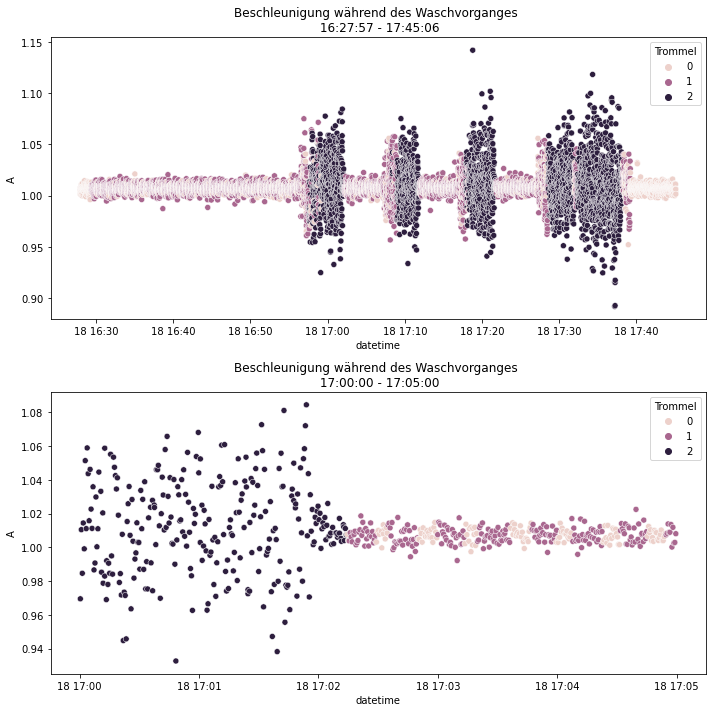

In [96]:
df_ = df[(df["datetime"]  >= "2022-01-18 17:00:00.000") & 
         (df["datetime"]  <= "2022-01-18 17:05:00.000") & 
         (df["Waschprogramm"] != "Default")]

df_trommel_stillstand = df_[(df_["Trommel"]  == 0)]
df_trommel_rotieren = df_[(df_["Trommel"]  == 1)]
df_trommel_schleudern = df_[(df_["Trommel"]  == 2)]

#print(len(df_))
#print("Stillstand",df_trommel_stillstand["A"].mean(),df_trommel_stillstand["A"].std())
#print("Rotieren  ",df_trommel_rotieren["A"].mean(),df_trommel_rotieren["A"].std())
#print("Schleudern",df_trommel_schleudern["A"].mean(),df_trommel_schleudern["A"].std())

print("Trommel-Zustände:")
print("0: Stillstand, 1: Rotieren, 2: Schleudern")

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Beschleunigung während des Waschvorganges \n 16:27:57 - 17:45:06")
sns.scatterplot(x="datetime", y="A", data=df, hue="Trommel")

plt.subplot(212)
plt.title("Beschleunigung während des Waschvorganges \n 17:00:00 - 17:05:00")
sns.scatterplot(x="datetime", y="A", data=df_, hue="Trommel")
#sns.histplot(x="A", data=df_, hue="Trommel")
plt.tight_layout()

In [14]:
import sys

data_dic = {
                    "datetime": "2021/12/22 22:29:54:277",
                    "AX": "0.04395",
                    "AY": "1.00073",
                    "AZ": "-0.11328",
                    }

print(sys.getsizeof(data_dic))

232


In [52]:
import pymongo
#from pymongo import MongoClient
client = pymongo.MongoClient("mongodb+srv://Matthias:<Matthias98>@cluster0.nnlr5.mongodb.net/myFirstDatabase?retryWrites=true&w=majority")
db = client["DLSP_Project"]
collection = db["Washing_machine_monitoring"]

In [53]:
df_import = pd.read_csv("ml_training_backup").drop(
    columns=["timedelta", "Unnamed: 0", "_id"])
df_import = df_import[df_import["Waschprogramm"] != "Default"]

import_dic = df_import.to_dict("index")

i=0
for dataset in import_dic:
    collection.insert_one(import_dic[dataset])
    print(i,"/", len(import_dic))
    i+=1

ServerSelectionTimeoutError: cluster0-shard-00-02.nnlr5.mongodb.net:27017: ,cluster0-shard-00-00.nnlr5.mongodb.net:27017: ,cluster0-shard-00-01.nnlr5.mongodb.net:27017: , Timeout: 30s, Topology Description: <TopologyDescription id: 6202ac0dca196caeb7a3fe52, topology_type: ReplicaSetNoPrimary, servers: [<ServerDescription ('cluster0-shard-00-00.nnlr5.mongodb.net', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('cluster0-shard-00-00.nnlr5.mongodb.net:27017: ')>, <ServerDescription ('cluster0-shard-00-01.nnlr5.mongodb.net', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('cluster0-shard-00-01.nnlr5.mongodb.net:27017: ')>, <ServerDescription ('cluster0-shard-00-02.nnlr5.mongodb.net', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('cluster0-shard-00-02.nnlr5.mongodb.net:27017: ')>]>

In [2]:
import socket

In [ ]:
tcp_port = 8000
tcp_ip = '192.168.101.129'

s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.bind((tcp_ip, tcp_port))
print("Waiting for Connection...")
s.listen(1)
conn, addr = s.accept()
print('Connection address:', addr)

Waiting for Connection...


In [2]:
from .src import gateway

ImportError: attempted relative import with no known parent package